In [1]:
#Fonte de dados: https://brasil.io/dataset/covid19/caso/
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [2]:
df = pd.read_excel(r"C:/Users/Windows/Afonso Lenzi/DataSets/Covid/covid19-09062020.xlsx")

In [3]:
df.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-06-09,AC,AcrelÃ¢ndia,city,167,2,True,15256.0,1200013.0,109465128.0,0.0120
1,2020-06-09,AC,Assis Brasil,city,69,4,True,7417.0,1200054.0,93029527.0,0.0580
2,2020-06-09,AC,BrasilÃ©ia,city,152,5,True,26278.0,1200104.0,57843063.0,0.0329
3,2020-06-09,AC,Bujari,city,88,1,True,10266.0,1200138.0,85719852.0,0.0114
4,2020-06-09,AC,Capixaba,city,73,1,True,11733.0,1200179.0,62217677.0,0.0137


In [4]:
df.tail()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
182709,2020-02-27,SP,NaN,state,1,0,False,45919049.0,35.0,0.00218,0.0
182710,2020-02-26,SP,SÃ£o Paulo,city,1,0,False,12252023.0,3550308.0,0.00816,0.0
182711,2020-02-26,SP,NaN,state,1,0,False,45919049.0,35.0,0.00218,0.0
182712,2020-02-25,SP,SÃ£o Paulo,city,1,0,False,12252023.0,3550308.0,0.00816,0.0
182713,2020-02-25,SP,NaN,state,1,0,False,45919049.0,35.0,0.00218,0.0


In [9]:
#separar em alguns  subsets para análises

df_estados = df[df['place_type']=='state']
df_cidades = df[df['place_type']=='city']
df_jgs = df[df['city_ibge_code']== 4208906]

In [10]:
df_jgs.dtypes

date                              datetime64[ns]
state                                     object
city                                      object
place_type                                object
confirmed                                  int64
deaths                                     int64
is_last                                     bool
estimated_population_2019                float64
city_ibge_code                           float64
confirmed_per_100k_inhabitants           float64
death_rate                               float64
dtype: object

In [11]:
#convertendo a data para datetime
df_jgs['date'] = pd.to_datetime(df_jgs['date'], format = '%Y-%m')

In [12]:
df_jgs.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
3357,2020-06-09,SC,JaraguÃ¡ do Sul,city,158,3,True,177697.0,4208906.0,889154.0,0.0190
7736,2020-06-08,SC,JaraguÃ¡ do Sul,city,152,3,False,177697.0,4208906.0,8553887.0,0.0197
12310,2020-06-07,SC,JaraguÃ¡ do Sul,city,152,3,False,177697.0,4208906.0,8553887.0,0.0197
16698,2020-06-06,SC,JaraguÃ¡ do Sul,city,141,2,False,177697.0,4208906.0,7934855.0,0.0142
21070,2020-06-05,SC,JaraguÃ¡ do Sul,city,145,2,False,177697.0,4208906.0,8159958.0,0.0138


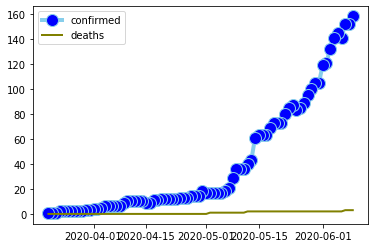

In [14]:
# gráfico comparando casos novos e acumulados
plt.plot( 'date', 'confirmed', data=df_jgs, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'date', 'deaths', data=df_jgs, marker='', color='olive', linewidth=2)

plt.legend()

In [16]:
# Vamos transformar a coluna de data no índice do conjunto de dados. Isso vai facilitar nosso trabalho mais a frente.
df_jgs_serie =  df_jgs.set_index('date')


In [17]:
df_jgs_serie.head()

,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,
2020-06-09,SC,JaraguÃ¡ do Sul,city,158,3,True,177697.0,4208906.0,889154.0,0.0190
2020-06-08,SC,JaraguÃ¡ do Sul,city,152,3,False,177697.0,4208906.0,8553887.0,0.0197
2020-06-07,SC,JaraguÃ¡ do Sul,city,152,3,False,177697.0,4208906.0,8553887.0,0.0197
2020-06-06,SC,JaraguÃ¡ do Sul,city,141,2,False,177697.0,4208906.0,7934855.0,0.0142
2020-06-05,SC,JaraguÃ¡ do Sul,city,145,2,False,177697.0,4208906.0,8159958.0,0.0138


In [18]:
df_jgs_serie.dtypes

state                              object
city                               object
place_type                         object
confirmed                           int64
deaths                              int64
is_last                              bool
estimated_population_2019         float64
city_ibge_code                    float64
confirmed_per_100k_inhabitants    float64
death_rate                        float64
dtype: object

In [19]:
# Será que algum valor nulo está presente nos dados?
df_jgs_serie.isnull().sum()

state                             0
city                              0
place_type                        0
confirmed                         0
deaths                            0
is_last                           0
estimated_population_2019         0
city_ibge_code                    0
confirmed_per_100k_inhabitants    0
death_rate                        0
dtype: int64

In [20]:
df_jgs_serie.describe()

,confirmed,deaths,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,82.000000,82.000000,82.0,82.0,8.200000e+01,82.000000
mean,41.231707,0.865854,177697.0,4208906.0,2.117540e+06,0.014167
std,46.249271,0.990849,0.0,0.0,2.543361e+06,0.017748
min,1.000000,0.000000,177697.0,4208906.0,5.627600e-01,0.000000
25%,9.000000,0.000000,177697.0,4208906.0,2.954468e+05,0.000000
50%,15.500000,0.000000,177697.0,4208906.0,7.315820e+05,0.000000
75%,73.000000,2.000000,177697.0,4208906.0,4.051841e+06,0.024775
max,158.000000,3.000000,177697.0,4208906.0,8.553887e+06,0.058800


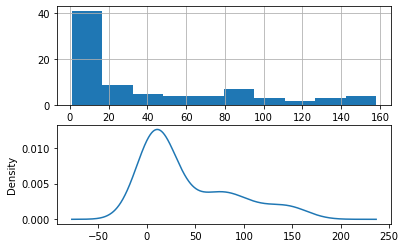

In [22]:
# Gráfico de Densidade

# Plot
plt.figure(1)

# Subplot 1
plt.subplot(211)
df_jgs_serie.confirmed.hist()

# Subplot 2
plt.subplot(212)
df_jgs_serie.confirmed.plot(kind = 'kde')
plt.show()

Análise:

A distribuição não é perfeitamente gaussiana (distribuição normal).
A distribuição está inclinada para a esquerda.
As transformações podem ser úteis antes da modelagem.

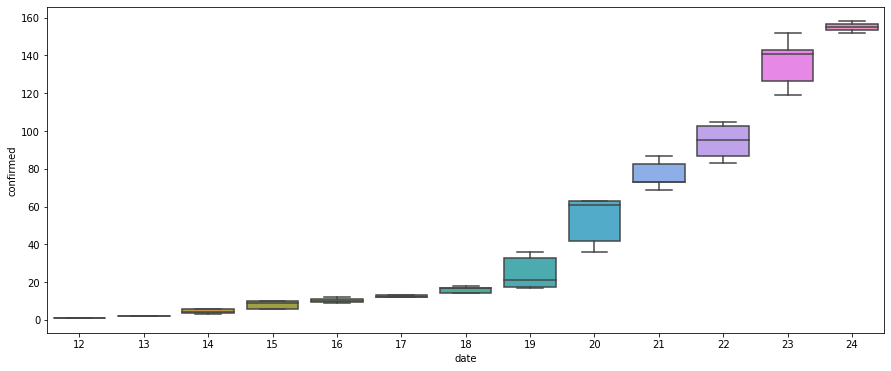

In [23]:
# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize=(15,6))

# Cria um box plot para cada semana usando o Seaborn
# Observe que estamos extraindo a semana (week) do índice da série
sns.boxplot(df_jgs_serie.confirmed.index.week, df_jgs_serie.confirmed, ax = ax)

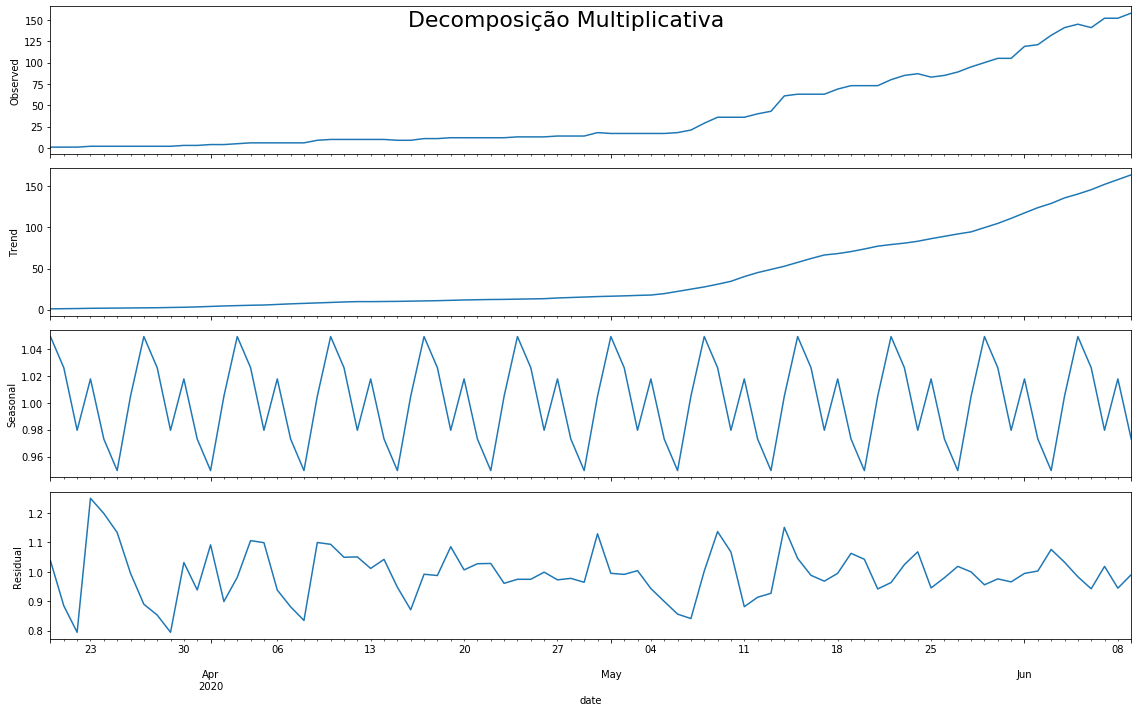

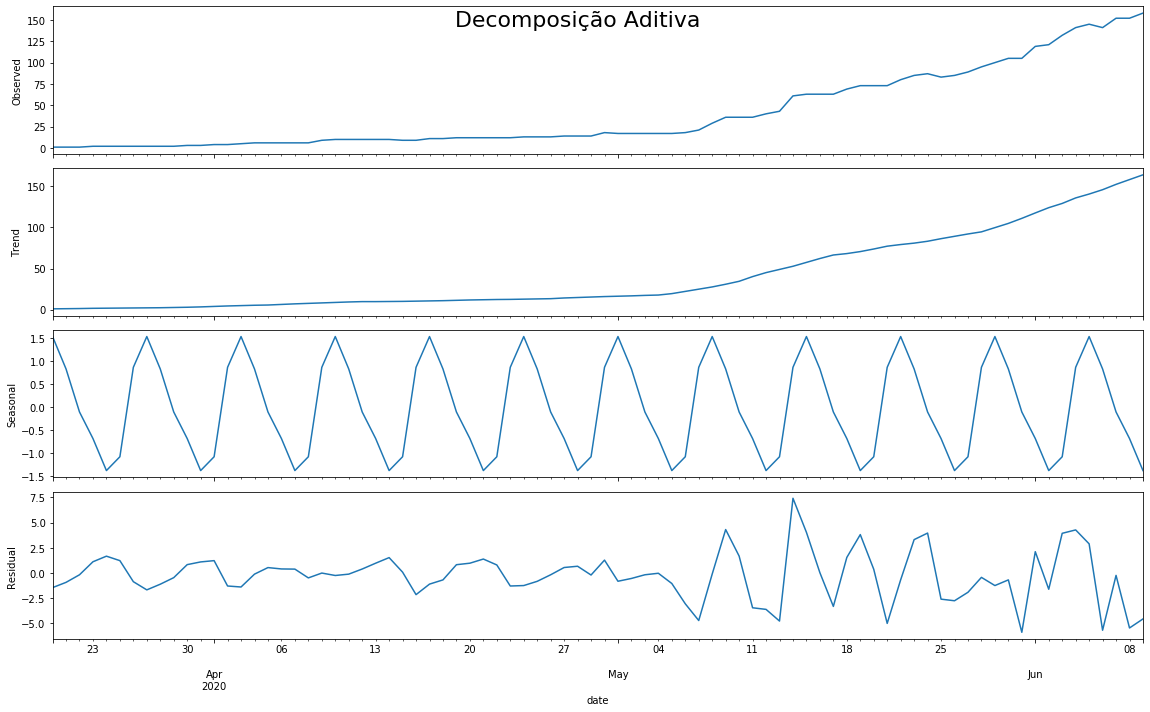

In [24]:
# Multiplicative Decomposition 
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(df_jgs_serie['confirmed'], model = 'multiplicative', 
                                                        extrapolate_trend = 'freq')

# Additive Decomposition
decomposicao_aditiva = sm.tsa.seasonal_decompose(df_jgs_serie['confirmed'], model = 'aditive', 
                                                 extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 22)
decomposicao_aditiva.plot().suptitle('Decomposição Aditiva', fontsize = 22)
plt.show()

No gráfico acima podemos ver os componentes da série temporal:

1- A primeira linha do gráfico mostra os dados observados.

2- A segunda linha mostra a tendência do gráfico, que claramente é uma tendência de crescimento, ou seja, 
o númeto de casos tende a crescer ao longo do tempo.

3- A terceira linha mostra a sazonalidade. Claramente temos períodos regulares de aumento e queda.


4- A quarta linha é o componete irregular ou resíduo.

Definir extrapolate_trend = 'freq' cuida de todos os valores ausentes na tendência e nos resíduos no início da série (se existirem, claro).

Se você observar atentamente os resíduos da decomposição aditiva, ela permanece com algum padrão. 
A decomposição multiplicativa, no entanto, parece bastante aleatória, o que é bom. 
Então, idealmente, a decomposição multiplicativa deve ser preferida para essa série específica.

A saída numérica da tendência, os componentes sazonais e residuais são armazenados na própria saída decomposicao_multiplicativa.
Vamos extraí-los e colocá-los em uma tabela de dados.

In [25]:
# Extrair os componentes
# Valores reais = Produto de (sazonal * tendência * resíduo)

# Concatena o resultado da decomposição da série
dados_serie_reconstruida = pd.concat([decomposicao_multiplicativa.seasonal, 
                                      decomposicao_multiplicativa.trend, 
                                      decomposicao_multiplicativa.resid, 
                                      decomposicao_multiplicativa.observed], axis = 1)

# Define o nome das colunas
dados_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

# Mostra o resultado
dados_serie_reconstruida

,Sazonalidade,Tendência,Resíduos,Valores_Observados
date,,,,
2020-06-09,0.973101,163.948980,0.990354,158
2020-06-08,1.017674,158.147959,0.944433,152
2020-06-07,0.979571,152.346939,1.018530,152
2020-06-06,1.026004,145.857143,0.942198,141
2020-06-05,1.049136,140.571429,0.983194,145
...,...,...,...,...
2020-03-24,0.973101,1.714286,1.198916,2
2020-03-23,1.017674,1.571429,1.250624,2
2020-03-22,0.979571,1.285714,0.793998,1


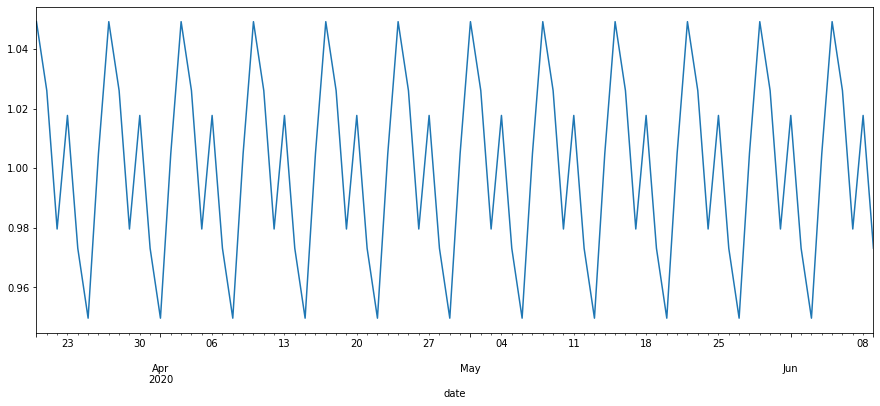

In [26]:
# Plot da série temporal
dados_serie_reconstruida['Sazonalidade'].plot(figsize = (15, 6))
plt.show()

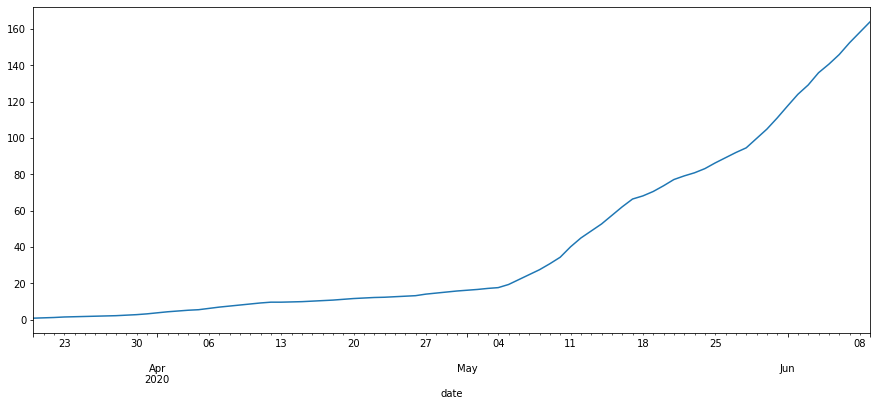

In [27]:
# Plot da série temporal
dados_serie_reconstruida['Tendência'].plot(figsize = (15, 6))
plt.show()

In [29]:
#criar data frame apenas com os casos acumulados e data para fazer média móvel

df_jgs_casos = df_jgs[['confirmed','date']].copy()


In [30]:
df_jgs_casos

,confirmed,date
3357,158,2020-06-09
7736,152,2020-06-08
12310,152,2020-06-07
16698,141,2020-06-06
21070,145,2020-06-05
...,...,...
181594,2,2020-03-24
181776,2,2020-03-23
181919,1,2020-03-22
182056,1,2020-03-21


In [31]:
#conferencia
df_jgs_casos.set_index("date",inplace=True)

### TESTE DE ESTACIONARIEDADE

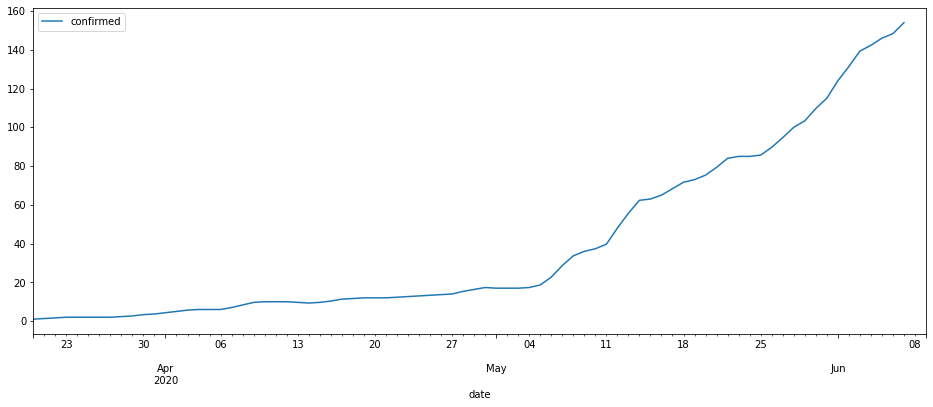

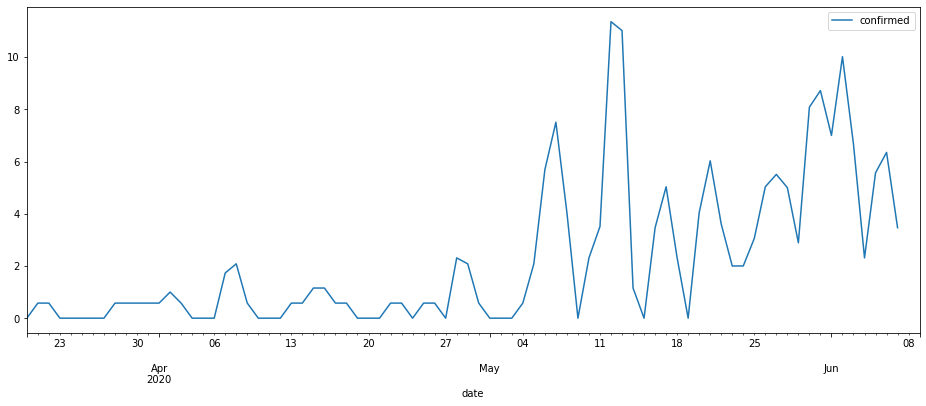

In [32]:
import matplotlib. pyplot as plt
mean = df_jgs_casos.rolling(3).mean().plot(figsize=(16,6))
std  = df_jgs_casos.rolling(3).std().plot(figsize=(16,6))

Neste gráfico podemos ver que a média móvel e o desvio padrão não são estáveis ao longo do tempo. Com isso podemos concluir que a série é não estacionária.


### Plots ACF e PACF

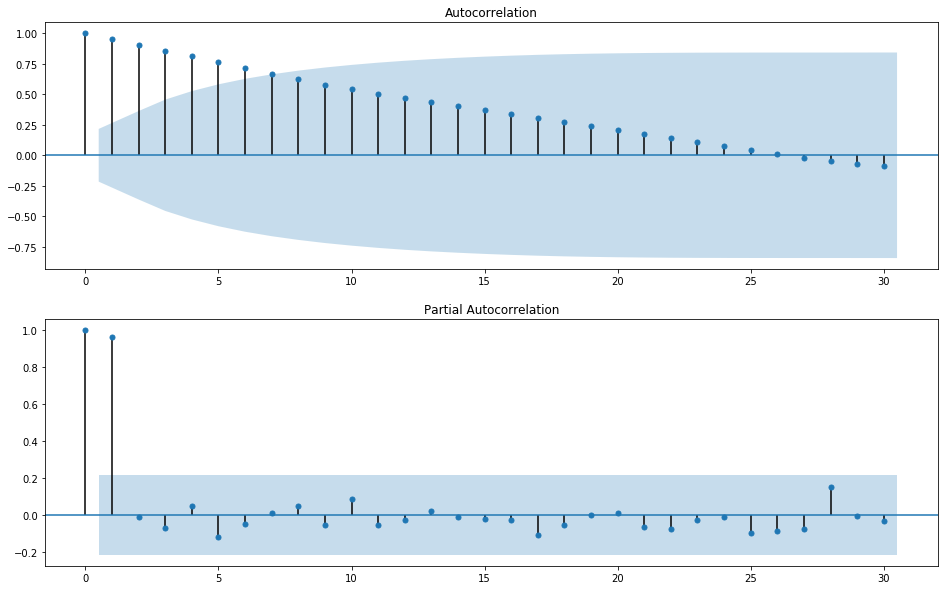

In [33]:
# Plots
plt.rcParams.update({'figure.figsize': (16,10)})

# Plot do gráfico ACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
plt.subplot(211)
plot_acf(df_jgs_serie.confirmed, ax = plt.gca(), lags = 30)

# Plot do gráfico PACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html
plt.subplot(212)
plot_pacf(df_jgs_serie.confirmed, ax = plt.gca(), lags = 30)
plt.show()

Interpretação dos Gráficos:

Na série temporal analisada podemos ver vários pontos dentro da área sombreada logo podemos afirmar que não existe correlação entre a série e seus lags.


### Teste Dickey-Fuller aumentado

A intuição por trás do teste é que, se a série for integrada, o nível de atraso da série y (t-1) não fornecerá informações relevantes na previsão da mudança em y (t).
Hipótese nula: a série temporal não é estacionária.
Rejeitar a hipótese nula (ou seja, um valor-p abaixo de 0.05) indicará estacionaridade.

Podemos confirmar que a nossa série é não estacionária.

In [34]:
# Teste Dickey-Fuller

# Print
print('\nResultado do Teste Dickey-Fuller:\n')

# Teste
dfteste = adfuller(df_jgs_serie.confirmed, autolag = 'AIC')

# Formatando a saída
dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                           'Valor-p',
                                           'Número de Lags Consideradas',
                                           'Número de Observações Usadas'])

# Loop por cada item da saída do teste
for key,value in dfteste[4].items():
    dfsaida['Valor Crítico (%s)'%key] = value

# Print
print (dfsaida)


Resultado do Teste Dickey-Fuller:

Estatística do Teste            -4.574099
Valor-p                          0.000144
Número de Lags Consideradas      5.000000
Número de Observações Usadas    76.000000
Valor Crítico (1%)              -3.519481
Valor Crítico (5%)              -2.900395
Valor Crítico (10%)             -2.587498
dtype: float64


## Previsão de novos casos com o Facebook Prophet

### 60 dias para frente vai de aproximadamente 158 para 450 casos num pior cenário ou para 350 num cenário mais otimista

In [35]:
df_jgs_prev = df_jgs[['date','confirmed']].copy()

In [36]:
df_jgs_prev=df_jgs_prev.rename(columns = {'date':'ds','confirmed':'y'})

In [37]:
from fbprophet import Prophet

m = Prophet()
m.fit(df_jgs_prev)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
137,2020-08-04,392.043790,354.427757,428.307159
138,2020-08-05,395.643450,356.689433,434.039509
139,2020-08-06,401.866788,362.548381,440.905176
140,2020-08-07,406.924125,366.274760,446.585708
141,2020-08-08,410.534335,368.168181,451.125804


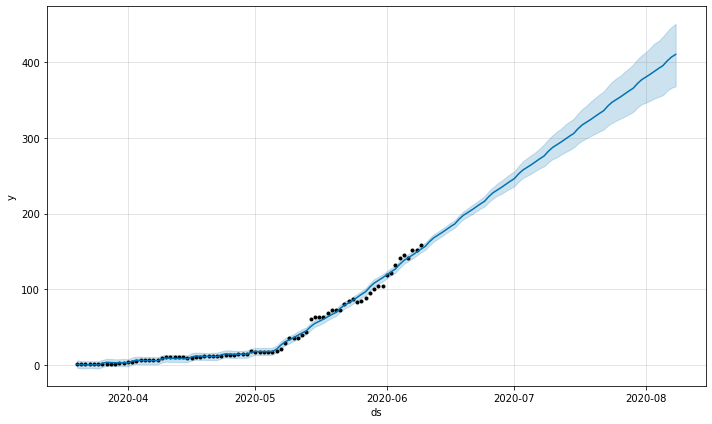

In [39]:
fig1 = m.plot(forecast)


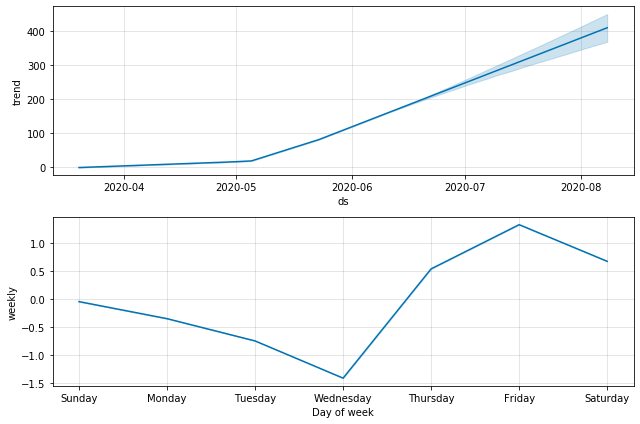

In [40]:
fig2 = m.plot_components(forecast)
